### Project Description

Lnaguage detection is an important area of research which has different applications. For example, chatbots with multi language support can detect language used by its user and respond accordingly. We will be using European Parliament Proceedings Parallel Corpus which is a text dataset used for evaluating language detection engines. The dataset is 1.5GB corpus which includes 21 languages spoken in EU. But we will be using only part of the corpus ( 100 files from each language) because of lack of time to train in and computational resources.

In [26]:
# Definations
PATH_DATA = './txt'
DATA_FILE_LIMIT = 100
PATH_RESULT_CSV = './Results/results.csv'

In [27]:
import glob
import os
import re

def load_data(cls):
    """ Decorator function to pass ass language data path"""
    cls._all_language_data_path = glob.glob(os.path.join(PATH_DATA,"*"))
    return cls

@load_data
class Language:
    """
    This class will read text from the dataset and make an object of itself for each language.
    Getting each class as an object will help us easily handle the data and explore the features
    of data easily.
    """
    _all_language_data_path = None
    _all_language = None
    
    def _get_name(self):
        "Find name of the model used"
        return self.data_path.split('/')[-1]
    
    def __init__(self,path):
        self.data_path = path
        self.total_files = None
        self.total_used_files = None
        self.word_count = 0
        
        self.name = self._get_name()
        self.all_text = self._read_data()
        self.unique_word_count = self._find_unique_word_count()
        self.unique_char_count = self._find_unique_character_count()
        
    def _word_tokenizer(self,text):
        """Tokenize word"""
        return text.split(" ")
    
    def _find_unique_word_count(self):
        """Return total number of unique words"""
        words = self._word_tokenizer(self.all_text)
        return len(set(words))     
    
    def _find_unique_character_count(self):
        "Return total number of unique characters"
        return len(set(self.all_text))
    
    def _read_file(self,path):
        """Read txt file"""
        with open(path,encoding='utf8') as lang_data:
            text = lang_data.read()
            self.word_count += len(self._word_tokenizer(text))
            return text
    
    def _read_data(self):
        """Read data from data folder"""
        data = None
        all_data = []
        # Read all txt files of a class
        list_of_files = glob.glob(os.path.join(self.data_path,"*.txt"))
        self.total_files = len(list_of_files)
        
        try:
            # Read text from all txt files
            for count,file in enumerate(list_of_files):
                # If file limit is None, read all files
                if not DATA_FILE_LIMIT:
                    data = self._read_file(file)
                else:
                    # Read only that number of files defined by DATA_FILE_LIMIT
                    if count < DATA_FILE_LIMIT:
                        data = self._read_file(file)
                    else:
                        break
                all_data.append(data)
            self.total_used_files = count
        except Exception as error:
            print(error)
        
        # Join all text into one single string
        return "/n".join(all_data)
    
    @classmethod
    def get_all_language(cls):
        """Return a list of all languages as OBJECTS"""
        if cls._all_language is None:
            cls._all_language = [Language(path) for path in cls._all_language_data_path]
        return cls._all_language
                    
                    
                    
                
        

We can use Language class to read the data and explore it. We will be exploring different properties of our first language whih is 'lv'. We can make similar exploration for other languages too.

In [33]:
# Get Language object for all the languages in our corpus
# all_language is a list of Language object
all_language = Language.get_all_language()

In [34]:
# From all_language we get our first Language object 
first_language = all_language[0]

# Get name of the language
first_language.name

'lv'

In [35]:
# Get total number of words
first_language.word_count

75276

In [37]:
# Get total number of unique words
# It is the length set of all words
first_language.unique_word_count

18957

In [38]:
# Get total number of unique character
# it is the length of set of all characters of the text
first_language.unique_char_count

158

In [39]:
# Get all text of the language
first_language.all_text

'<CHAPTER ID="016">\nDokumentu iesniegšana (sk. protokolu)\n/n<CHAPTER ID="004-04">\n4. Iestāžu nolīguma slēgšana par budžeta disciplīnu un pareizu finanšu pārvaldību (balsojums)\n/n<CHAPTER ID="006-04">\n4. 2007. gada budžeta izpildes apstiprināšana -  Eiropas Ombuds (\n/n<CHAPTER ID="004-12">\n12. Makrofinansiālā palīdzība Serbijai (\n/n<CHAPTER ID="001">\nSēdes atklāšana\n<P>\n(" συνεδρίαση αρχίζει στις 9.40 π.μ.)\n/n<CHAPTER ID="008-06">\n6.  Viltošanas novēršanas tirdzniecības nolīgums (\n/n<CHAPTER ID="012">\nBalsošanas laiks\n/n<CHAPTER ID="006-16">\n16. Lokomotīvju un vilcienu vadības apkalpju sertificēšana (balsojums)\n<P>\n- Ziņojums: Savary\n/n<CHAPTER ID="011-07">\n7. Juridiskās profesijas un vispārēja interese par tiesību sistēmu darbību (balsojums)\n/n<CHAPTER ID="014">\nDokumentu iesniegšana (sk. protokolu)\n/n<CHAPTER ID="004">\nDokumentu iesniegšana (sk. protokolu)\n/n<CHAPTER ID="012">\nIepriekšējās sēdes protokola apstiprināšana (sk. protokolu)\n<SPEAKER ID="303" NAM

### Visualization

We can visualize the properties of different languages to get better understanding of our data

In [57]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

class Visualization:
    """
    Class to visualize properties of different languages of the courpus
    Takes list of Language object 
    """
    def __init__(self,languages):
        # List of Language object
        self.languages = languages
    
    def _plot(self,x,y,labels,ylabel,xlabel):
        """ Plot bar diagram """
        plt.figure(figsize=(10,5))
        plt.bar(x, y, align='center', alpha=1)
        plt.xticks(x, labels)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        
        plt.show()
        
    def visualize_word_count(self):
        """Visualize word count of different languages"""
        
        # Get names of languages
        names = [language.name for language in self.languages]
        # Get word count of all languages
        word_count = [language.word_count for language in self.languages]
        x = np.arange(len(names))
        
        # Bar plot for word count
        self._plot(x,word_count,names,ylabel='Word Count',xlabel='Languages')

    def visualize_unique_word_count(self):
        """Visualize unique word count"""
        names = [language.name for language in self.languages]
        unique_word_count = [language.unique_word_count for language in self.languages]
        x = np.arange(len(names))
        
        self._plot(x,unique_word_count,names,ylabel='Unique Word Count',xlabel='Languages')
    
    def visualize_unique_char_count(self):
        """Visualize unique character count"""
        names = [language.name for language in self.languages]
        unique_char_count = [language.unique_char_count for language in self.languages]
        x = np.arange(len(names))

        self._plot(x,unique_char_count,names,ylabel='Unique Character Count',xlabel='Languages')



We can now explore data distribution among different classes. For that we will be using methods of Visualization class

In [95]:
# Instantiate a Visualization object
lang_viz = Visualization(languages=all_language)

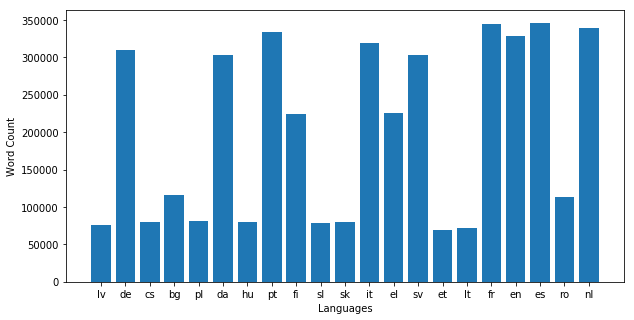

In [96]:
# Visualize word count for different lanuages
lang_viz.visualize_word_count()

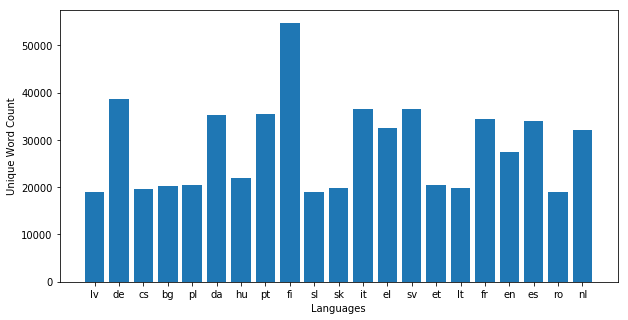

In [97]:
# Visualization of unique word count
lang_viz.visualize_unique_word_count()

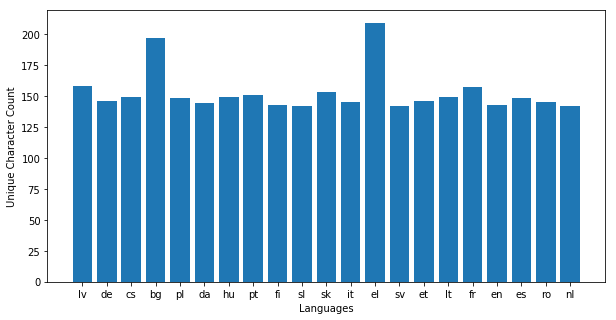

In [56]:
# Visualization of unique characters count
lang_viz.visualize_unique_char_count()

From the graphs we can observe that :
1. Based on word, classes seems imbalanced which mean some classes have more words than other
2. Based on characters, classes are more balanced

We can assume from the graph that we will get more unbiased model which is based on characters.

# Data Preparation

We will clean our data ( both training and test). We will then use pandas dataframe to manage the data for training and testing

In [58]:
import pandas as pd

class CleanData:
    """
    Class to clean text by removing unwanted words and characters
    """
    @classmethod
    def _clean(cls,data,pos):
        """
            Function to clean string.
            Takes pandas dataframe .
            Data is a pandas dataframe.
            Pos is the column index for the text
        """
        data[pos]= data[pos].str.replace('\s', ' ')
        data[pos]= data[pos].str.replace('ID', ' ')
        data[pos]= data[pos].str.replace('NAME', ' ')
        data[pos]= data[pos].str.replace('SPEAKER', ' ')
        data[pos]= data[pos].str.replace('CHAPTER', ' ')
        data[pos]= data[pos].str.replace('LANGUAGE', ' ')
        data[pos]= data[pos].str.replace('<P>', ' ')
        data[pos]= data[pos].str.replace('/', ' ')
        data[pos]= data[pos].str.replace('[=<>":-;.,\(\)]', ' ')
        data[pos]= data[pos].str.replace('[0-9]', ' ')
        data[pos]= data[pos].str.strip()
        data = data[data[pos] != '']
        data= data.drop_duplicates()
        data=data.dropna()
        return(data)
    
    @classmethod
    def clean_training_df(cls,data):
        return cls._clean(data,0)
    
    @classmethod
    def clean_test_df(cls,data):
        return cls._clean(data,0)
    
        

In [71]:
# Get text of all languages
all_language_text = [language.all_text for language in all_language]

In [72]:
# Create dataframe using the text
training_data = pd.DataFrame(all_language_text)

In [73]:
training_data.head()

,0
0,"<CHAPTER ID=""016"">\nDokumentu iesniegšana (sk...."
1,"<CHAPTER ID=""016"">\nVorlage von Dokumenten: si..."
2,"<CHAPTER ID=""016"">\nPředložení dokumentů: viz ..."
3,"<CHAPTER ID=""016"">\nВнасяне на документи: вж. ..."
4,"<CHAPTER ID=""016"">\nSkładanie dokumentów: patr..."


We see that the text contain different unwanted words and characters. Infact, we can observe that CHAPTER ID,digits etc occur in all text. SO we will have to remove all unwanted words and characters first before training our model.

In [74]:
# Cleaning training data
training_data = CleanData.clean_training_df(data=training_data)
training_data.head()

,0
0,Dokumentu iesniegšana sk protokolu n ...
1,Vorlage von Dokumenten siehe Protokoll n ...
2,Předložení dokumentů viz zápis n - ...
3,Внасяне на документи вж протоколи n ...
4,Składanie dokumentów patrz protokół n ...


In [75]:
# Getting name of all classes
# Required while training
labels = [language.name for language in all_language]

### Read test dataset

In [76]:
datatest = pd.read_csv('./europarl.test', sep='\t',header=None)
datatest.head()

,0,1
0,bg,Европа 2020 не трябва да стартира нов конкурен...
1,bg,(CS) Най-голямата несправедливост на сегашната...
2,bg,"(DE) Г-жо председател, г-н член на Комисията, ..."
3,bg,"(DE) Г-н председател, бих искал да започна с к..."
4,bg,"(DE) Г-н председател, въпросът за правата на ч..."


In [77]:
# Clean test dataset
datatest[1]= datatest[1].str.replace('\(.*?\)','')
testData= CleanData.clean_test_df(data=datatest)

In [78]:
testData.head()

,0,1
0,bg,Европа 2020 не трябва да стартира нов конкурен...
1,bg,Най-голямата несправедливост на сегашната общ...
2,bg,"Г-жо председател, г-н член на Комисията, по п..."
3,bg,"Г-н председател, бих искал да започна с комен..."
4,bg,"Г-н председател, въпросът за правата на човек..."


# Model Building

We will be using bag of words approach for developing our classifier

In [104]:
# Libraries for building model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Libraries for testing
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_fscore_support


import pandas as pd
import os
import time


class BagsOfWords:
    def __init__(self,model,train_df,test_df,labels):
        self.model = model
        self.train_df = train_df
        self.test_df = test_df
        self.labels = labels
        self.model_name = self._get_model_name()
        
        self.classifier_pipeline = None
        self._prediction = None
        self._accuracy = None
        self._precision = None
        self._recall = None
        self._f1_score = None
        self._total_file_used = DATA_FILE_LIMIT
        self._ngram = None
        self._use_idf = None
        self._train_time = None
        self._test_time = None
        self._analyzer = None
        self._report = None
        
    
    def _get_model_name(self):
        """Get name of model being used"""
        model_name = str(self.model).split('(')[0]
        return model_name
        
    def print_results(self,DETAIL=False):
        """ Print results in formatted way"""
        
        print("Model name: ", self.model_name)
        print("Accuracy: ", self._accuracy)
        print("Precision: ", self._precision)
        print("Recall: ", self._recall)
        print("F1 Score: ", self._f1_score)
        print("Ngram: ", self._ngram)
        print("Total Features: ", self._total_feature)
        print("Analyzer: ", self._analyzer)
        print("Use idf: ", self._use_idf)
        
        # Print detail report which include precision , recall, f1 score and support for all classes
        if DETAIL:
            print("Detail report")
            print("#"*100)
            self._report = classification_report(self.test_df[0], self._prediction)
            print(self._report)
            
    
    def save_results(self):
        """
            Save results in a csv file.
            Append all the results in same file
        """
        # Columns of the csv file in which result are stored
        columns = ['model_name','model_details', 'total_file_used', 'ngram','use_idf',
                'accuracy','precision','recall','f1_score','analyzer','total_features','training_time','test_time']
        
        # Create a csv called result.csv if it doesn't exist already
        if not os.path.exists(PATH_RESULT_CSV):
            df = pd.DataFrame(columns=columns,)
            df.to_csv(PATH_RESULT_CSV,index=False)
        
        # Different results obtained after training a model
        result = [self.model_name, str(self.model), self._total_file_used,self._ngram,self._use_idf, 
                   self._accuracy, self._precision, self._recall,self._f1_score,
                  self._analyzer,self._total_feature, self._train_time, self._test_time]
        
        # Convert the results into pandas dataframe
        result_df = pd.DataFrame([result], columns=columns)
        
        # Append result in the csv file
        with open(PATH_RESULT_CSV, 'a') as f:
            result_df.to_csv(f, mode='a', header=False, index=False)

        
        print("Result saved successfully")
    
    def get_count_vectorizer(self):
        """ Return countvectorizer used in the pipeline"""
        return self.classifier_pipeline.get_params()['vect']
     
    
    def train_model(self,ngram,use_idf,analyzer):
        """ 
            Train model
            ngram: int
            use_idf: bool
            analyzer: string
        
        """
        current_time = time.time()
        self._ngram = ngram
        self._use_idf = use_idf
        self._analyzer = analyzer
        
        # Set a pipeline
        # 1. The first step of the pipeline is to find count vectorizer
        # Countvectorizer converts a collection of text documents to a matrix of token counts
        # This implementation produces a sparse representation of the counts
        # 2. We then use TfidfTransformr
        # TfidfTransformer transforms a count matrix to a normalized tf or tf-idf representation
        # Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.
        # 3. Finally, the tf of tf-idf are used by classification algorithm like logistic regression 


        self.classifier_pipeline = Pipeline([('vect', CountVectorizer(ngram_range=(1,ngram), 
                analyzer=self._analyzer)), ('tfidf', TfidfTransformer(use_idf=use_idf)), 
                ('model', self.model)])
        self._classifier = self.classifier_pipeline.fit(self.train_df[0], self.labels)
        
        self._train_time = time.time() - current_time
        
        # Finding total features used
        # It is the count of ngrams
        count_vect = self.get_count_vectorizer()
        self._total_feature = len(count_vect.get_feature_names())
        
        
        print("Training completed")
        print("Training time for {} : {} secs".format(self.model_name, self._train_time))
    
    def test_model(self):
        """
            Test model
            Find accuracy, precision, recall and f1_score
        """
        current_time = time.time()
        
        # Make predition
        self._prediction = self._classifier.predict(self.test_df[1])
        
        # Find accuracy , precision, recall and f1_score from the predicted data
        # Comparing labels from test data with predicted labels
        self._accuracy = accuracy_score(self.test_df[0], self._prediction)
        result = precision_recall_fscore_support(self.test_df[0], self._prediction,average='weighted')
        self._precision =result[0]
        self._recall = result[1]
        self._f1_score = result[2]
    
        self._test_time = time.time() - current_time
        
        print('Test completed successfully')
        print("Testing time for {} : {} secs".format(self.model_name, self._test_time))
    
    
        

### Logistic Regression

We will first use logistic regression as our classifier. We will use methods from BagsOfWords class.
We will use train_model method to train our model
We will use test_model to test our model
We will use save_results to save our results

In [105]:
from sklearn.linear_model import LogisticRegression


In [106]:
# Create BagOfWords object for logistic regression
model = LogisticRegression()
language_classifier = BagsOfWords(model=model,train_df=training_data,test_df=testData,labels=labels)

In [101]:
# We will train our pipline using 1 gram of word 
# We wont use idf
language_classifier.train_model(1,use_idf=False, analyzer='word')

Training completed
Training time for LogisticRegression : 4.535299062728882 secs


In [102]:
# We can see the 1 grams used by our model
vect = language_classifier.get_count_vectorizer()
vect.get_feature_names()

['aa',
 'aaa',
 'aadressil',
 'aafrika',
 'aafrikaga',
 'aafrikale',
 'aafrikas',
 'aafrikast',
 'aafrikat',
 'aalmoezen',
 'aaltopituudella',
 'aamun',
 'aamuna',
 'aamusta',
 'aamuun',
 'aamuvarhaisella',
 'aan',
 'aanbesteding',
 'aanbestedingen',
 'aanbestedingsprocedure',
 'aanbeveelt',
 'aanbevelen',
 'aanbeveling',
 'aanbevelingen',
 'aanbevolen',
 'aanbieden',
 'aanbieder',
 'aanbieders',
 'aanbiedingen',
 'aanbiedt',
 'aanbinden',
 'aanbod',
 'aanbrengen',
 'aandacht',
 'aandachtig',
 'aandachtiger',
 'aandachtspunt',
 'aandachtspunten',
 'aandeel',
 'aandeelhouder',
 'aandeelhouders',
 'aandelenbezit',
 'aandient',
 'aandoen',
 'aandoening',
 'aandoeningen',
 'aandragen',
 'aandringen',
 'aandringt',
 'aanduidt',
 'aaneengesloten',
 'aangaan',
 'aangaande',
 'aangaat',
 'aangaf',
 'aangeboden',
 'aangeboord',
 'aangeboren',
 'aangebracht',
 'aangebroken',
 'aangedragen',
 'aangedrongen',
 'aangeduid',
 'aangeeft',
 'aangegaan',
 'aangegane',
 'aangegeven',
 'aangegrepen',
 'a

In [93]:
# Test the model
language_classifier.test_model()

Test completed successfully
Testing time for LogisticRegression : 0.46112775802612305 secs


In [94]:
# Print results of the test
language_classifier.print_results(DETAIL=True)

Model name:  LogisticRegression
Accuracy:  0.919915295024
Precision:  0.929885620683
Recall:  0.919915295024
F1 Score:  0.921769343316
Ngram:  1
Total Features:  313473
Analyzer:  word
Use idf:  False
Detail report
####################################################################################################
             precision    recall  f1-score   support

         bg       0.63      1.00      0.77       998
         cs       0.90      0.80      0.85       994
         da       0.99      0.95      0.97       995
         de       0.97      0.98      0.98       995
         el       0.99      1.00      1.00       989
         en       0.93      0.97      0.95      1000
         es       0.97      0.88      0.92       997
         et       0.97      0.84      0.90       995
         fi       0.88      0.88      0.88       996
         fr       1.00      0.90      0.94      1000
         hu       0.98      0.97      0.97       999
         it       0.97      0.95      0.96     

We now build a classifier based 1 gram of characters

In [27]:
# Train 1 gram of characters logistic regression classifier
language_classifier.train_model(1,use_idf=False, analyzer='char')

Training completed
Training time for LogisticRegression : 3.910316228866577 secs


In [28]:
# We can see the 1 grams of characters used by our model
vect = language_classifier.get_count_vectorizer()
vect.get_feature_names()

[' ',
 '!',
 '#',
 '%',
 '&',
 "'",
 '*',
 '+',
 '-',
 '?',
 '[',
 '\\',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '¡',
 '£',
 '§',
 'ª',
 '«',
 '°',
 '´',
 '·',
 'º',
 '»',
 '½',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'ì',
 'í',
 'î',
 'ï',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 'ø',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'ā',
 'ă',
 'ą',
 'ć',
 'č',
 'ď',
 'ē',
 'ė',
 'ę',
 'ě',
 'ğ',
 'ģ',
 'ī',
 'į',
 'ı',
 'ķ',
 'ĺ',
 'ļ',
 'ľ',
 'ł',
 'ń',
 'ņ',
 'ň',
 'ő',
 'œ',
 'ŕ',
 'ř',
 'ś',
 'ş',
 'š',
 'ţ',
 'ť',
 'ū',
 'ů',
 'ű',
 'ų',
 'ź',
 'ż',
 'ž',
 'ș',
 'ț',
 'ΐ',
 'ά',
 'έ',
 'ή',
 'ί',
 'ΰ',
 'α',
 'β',
 'γ',
 'δ',
 'ε',
 'ζ',
 'η',
 'θ',
 'ι',
 'κ',
 'λ',
 'μ',
 'ν',
 'ξ',
 'ο',
 'π',
 'ρ',
 'ς',
 'σ',
 'τ',
 'υ',
 'φ',
 'χ',
 'ψ',
 'ω',
 'ϊ',
 'ϋ',
 'ό',
 'ύ',
 'ώ',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й

In [29]:
# Test 1 gram of character model
language_classifier.test_model()
language_classifier.print_results()

Test completed successfully
Testing time for LogisticRegression : 0.6898703575134277 secs
Model name:  LogisticRegression
Accuracy:  0.822215805179
Precision:  0.845715519846
Recall:  0.822215805179
F1 Score:  0.818396272119
Ngram:  1
Total Features:  200
Analyzer:  char
Use idf:  False


From above two experiments , we found that two models have different performance on the test set. We will now explore further. We will observe how logistic regression perform for ngram 1 to 5. We will also observe how usinf idf affects performance. We will also observe performance difference of word and character based model

In [108]:
# Ngram from 1 to 5
ngram = range(1,6)

In [35]:
# Train word based classifier without using idf
# Save the results for further analysis
analyzer='word'
use_idf = False

for n in ngram:
    language_classifier.train_model(n,use_idf=use_idf, analyzer=analyzer)
    language_classifier.test_model()
    language_classifier.print_results(DETAIL=False)
    language_classifier.save_results()
    print('#'*100)

Training completed
Training time for LogisticRegression : 4.531918287277222 secs
Test completed successfully
Testing time for LogisticRegression : 0.4594919681549072 secs
Model name:  LogisticRegression
Accuracy:  0.919915295024
Precision:  0.929885620683
Recall:  0.919915295024
F1 Score:  0.921769343316
Ngram:  1
Total Features:  313473
Analyzer:  word
Use idf:  False
Result saved successfully
####################################################################################################
Training completed
Training time for LogisticRegression : 24.1071195602417 secs
Test completed successfully
Testing time for LogisticRegression : 0.8800814151763916 secs
Model name:  LogisticRegression
Accuracy:  0.918230821061
Precision:  0.930088259362
Recall:  0.918230821061
F1 Score:  0.920592657286
Ngram:  2
Total Features:  2294420
Analyzer:  word
Use idf:  False
Result saved successfully
####################################################################################################
Tr

We can observe that varying ngram for word doesn't have significant effect

In [36]:
# Train word based classifier using idf
# Save the results for further analysis
analyzer='word'
use_idf = True

for n in ngram:
    language_classifier.train_model(n,use_idf=use_idf, analyzer=analyzer)
    language_classifier.test_model()
    language_classifier.print_results(DETAIL=False)
    language_classifier.save_results()
    print('#'*100)

Training completed
Training time for LogisticRegression : 5.969593048095703 secs
Test completed successfully
Testing time for LogisticRegression : 0.5567233562469482 secs
Model name:  LogisticRegression
Accuracy:  0.962219655405
Precision:  0.96527880545
Recall:  0.962219655405
F1 Score:  0.962701530462
Ngram:  1
Total Features:  313473
Analyzer:  word
Use idf:  True
Result saved successfully
####################################################################################################
Training completed
Training time for LogisticRegression : 24.86300301551819 secs
Test completed successfully
Testing time for LogisticRegression : 0.9223270416259766 secs
Model name:  LogisticRegression
Accuracy:  0.963134084127
Precision:  0.966384937698
Recall:  0.963134084127
F1 Score:  0.963687232868
Ngram:  2
Total Features:  2294420
Analyzer:  word
Use idf:  True
Result saved successfully
####################################################################################################
Trai

Using idf significantly improves the performance. But the performance across all ngrams didnot vary

In [37]:
# Train character based classifier without using idf
# Save the results for further analysis
analyzer='char'
use_idf = False

for n in ngram:
    language_classifier.train_model(n,use_idf=use_idf, analyzer=analyzer)
    language_classifier.test_model()
    language_classifier.print_results(DETAIL=False)
    language_classifier.save_results()
    print('#'*100)

Training completed
Training time for LogisticRegression : 5.179431676864624 secs
Test completed successfully
Testing time for LogisticRegression : 0.8002333641052246 secs
Model name:  LogisticRegression
Accuracy:  0.822215805179
Precision:  0.845715519846
Recall:  0.822215805179
F1 Score:  0.818396272119
Ngram:  1
Total Features:  200
Analyzer:  char
Use idf:  False
Result saved successfully
####################################################################################################
Training completed
Training time for LogisticRegression : 12.294049739837646 secs
Test completed successfully
Testing time for LogisticRegression : 2.4697158336639404 secs
Model name:  LogisticRegression
Accuracy:  0.920877851574
Precision:  0.927461634643
Recall:  0.920877851574
F1 Score:  0.920227270324
Ngram:  2
Total Features:  5605
Analyzer:  char
Use idf:  False
Result saved successfully
####################################################################################################
Traini

We can observe that character based classifier improves significantly by increasing ngram. We can also observe that after certain ngram, the performance didnot improve significantly

In [38]:
# Train character based classifier without idf
# Save the results for further analysis
analyzer='char'
use_idf = True

for n in ngram:
    language_classifier.train_model(n,use_idf=use_idf, analyzer=analyzer)
    language_classifier.test_model()
    language_classifier.print_results(DETAIL=False)
    language_classifier.save_results()
    print('#'*100)

Training completed
Training time for LogisticRegression : 4.167065143585205 secs
Test completed successfully
Testing time for LogisticRegression : 0.6603050231933594 secs
Model name:  LogisticRegression
Accuracy:  0.862883819424
Precision:  0.876355375028
Recall:  0.862883819424
F1 Score:  0.860959909823
Ngram:  1
Total Features:  200
Analyzer:  char
Use idf:  True
Result saved successfully
####################################################################################################
Training completed
Training time for LogisticRegression : 12.979086637496948 secs
Test completed successfully
Testing time for LogisticRegression : 2.5272393226623535 secs
Model name:  LogisticRegression
Accuracy:  0.94936952546
Precision:  0.952029763204
Recall:  0.94936952546
F1 Score:  0.94922828513
Ngram:  2
Total Features:  5605
Analyzer:  char
Use idf:  True
Result saved successfully
####################################################################################################
Training co

We can observe that performance of character based classifer improved by the use of idf. We can also observe that it improves as ngramincreases but after certain ngram, the performance didnot improve significantly.


### SVM

We will perform similar analysis as above for SVM. As we have observed from the results of Logistic regression, that using idf improves performance, we will be using idf for all SVM models

In [44]:
from sklearn import svm
model = svm.SVC()

# Instantiate BagOfWords object for SVM classifier
language_classifier = BagsOfWords(model=model,train_df=training_data,test_df=testData,labels=labels)

In [45]:
# Train word based ngram model using idf
# Save results
analyzer='word'
use_idf = True

for n in ngram:
    language_classifier.train_model(n,use_idf=use_idf, analyzer=analyzer)
    language_classifier.test_model()
    language_classifier.print_results(DETAIL=False)
    language_classifier.save_results()
    print('#'*100)

Training completed
Training time for SVC : 3.7238595485687256 secs
Test completed successfully
Testing time for SVC : 9.826819658279419 secs
Model name:  SVC
Accuracy:  0.974973529695
Precision:  0.975639073967
Recall:  0.974973529695
F1 Score:  0.975060931682
Ngram:  1
Total Features:  313473
Analyzer:  word
Use idf:  True
Result saved successfully
####################################################################################################
Training completed
Training time for SVC : 14.1800217628479 secs
Test completed successfully
Testing time for SVC : 64.67350268363953 secs
Model name:  SVC
Accuracy:  0.977524304553
Precision:  0.977973896784
Recall:  0.977524304553
F1 Score:  0.977583752074
Ngram:  2
Total Features:  2294420
Analyzer:  word
Use idf:  True
Result saved successfully
####################################################################################################
Training completed
Training time for SVC : 32.35542440414429 secs
Test completed successfully
T

In [46]:
# Train character based ngram model using idf
# Save results
analyzer='char'
use_idf = True

for n in ngram:
    language_classifier.train_model(n,use_idf=use_idf, analyzer=analyzer)
    language_classifier.test_model()
    language_classifier.print_results(DETAIL=False)
    language_classifier.save_results()
    print('#'*100)

Training completed
Training time for SVC : 4.972912073135376 secs
Test completed successfully
Testing time for SVC : 0.7701373100280762 secs
Model name:  SVC
Accuracy:  0.891471748965
Precision:  0.895250131597
Recall:  0.891471748965
F1 Score:  0.892364997711
Ngram:  1
Total Features:  200
Analyzer:  char
Use idf:  True
Result saved successfully
####################################################################################################
Training completed
Training time for SVC : 12.525273323059082 secs
Test completed successfully
Testing time for SVC : 3.4421472549438477 secs
Model name:  SVC
Accuracy:  0.956829338724
Precision:  0.957574890135
Recall:  0.956829338724
F1 Score:  0.956973401841
Ngram:  2
Total Features:  5605
Analyzer:  char
Use idf:  True
Result saved successfully
####################################################################################################
Training completed
Training time for SVC : 23.587806463241577 secs
Test completed successfully
Tes

From the above results we found that 5 gram character SVM model has highest accuracy. Details result analysis can be found in **result_analysis.ipynb**